In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
import pprint
from datetime import date
import warnings
warnings.filterwarnings("ignore")
import config

# 1. Historical stock prices

### 1.1 Extended time period

In [2]:
url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-prices"

querystring = {"EndDateInclusive":"2020-06-23","StartDateInclusive":"2020-06-21","Symbol":"GOOG","OrderBy":"Ascending"}

headers = {
	"X-RapidAPI-Key": config.api_key,
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)

Full API response

{'offset': 0,
 'responseStatus': None,
 'results': [{'adjClose': 72.593002,
              'close': 72.593002,
              'date': '2020-06-22',
              'high': 72.637497,
              'low': 71.1605,
              'open': 71.449997,
              'volume': 30848000},
             {'adjClose': 73.220497,
              'close': 73.220497,
              'date': '2020-06-23',
              'high': 73.79705,
              'low': 72.262001,
              'open': 72.781998,
              'volume': 28596000},
             {'adjClose': 71.598503,
              'close': 71.598503,
              'date': '2020-06-24',
              'high': 73.771004,
              'low': 71.487503,
              'open': 73.0755,
              'volume': 35120000},
             {'adjClose': 72.066498,
              'close': 72.066498,
              'date': '2020-06-25',
              'high': 72.144997,
              'low': 71.0,
              'open': 71.495003,
              'volume': 246

              'volume': 32004000},
             {'adjClose': 88.388496,
              'close': 88.388496,
              'date': '2020-12-15',
              'high': 88.570999,
              'low': 87.497498,
              'open': 88.221001,
              'volume': 29646000},
             {'adjClose': 88.150002,
              'close': 88.150002,
              'date': '2020-12-16',
              'high': 88.650002,
              'low': 87.804001,
              'open': 88.643997,
              'volume': 30270000},
             {'adjClose': 87.394997,
              'close': 87.394997,
              'date': '2020-12-17',
              'high': 88.589203,
              'low': 86.932999,
              'open': 88.425499,
              'volume': 32494000},
             {'adjClose': 86.550499,
              'close': 86.550499,
              'date': '2020-12-18',
              'high': 87.755501,
              'low': 86.011002,
              'open': 87.709,
              'volume': 80328000},
        

              'volume': 16680000},
             {'adjClose': 129.177002,
              'close': 129.177002,
              'date': '2021-07-08',
              'high': 130.032501,
              'low': 128.039993,
              'open': 128.25,
              'volume': 19780000},
             {'adjClose': 129.574493,
              'close': 129.574493,
              'date': '2021-07-09',
              'high': 129.849503,
              'low': 128.943497,
              'open': 128.944504,
              'volume': 15106000},
             {'adjClose': 130.563995,
              'close': 130.563995,
              'date': '2021-07-12',
              'high': 130.770004,
              'low': 129.600006,
              'open': 129.833496,
              'volume': 16944000},
             {'adjClose': 130.994507,
              'close': 130.994507,
              'date': '2021-07-13',
              'high': 132.042007,
              'low': 130.636993,
              'open': 130.8815,
              'volume': 16

              'high': 145.212997,
              'low': 141.149994,
              'open': 144.495499,
              'volume': 26688000},
             {'adjClose': 143.796494,
              'close': 143.796494,
              'date': '2021-12-06',
              'high': 144.351501,
              'low': 140.647003,
              'open': 143.574005,
              'volume': 22198000},
             {'adjClose': 148.036499,
              'close': 148.036499,
              'date': '2021-12-07',
              'high': 148.300003,
              'low': 145.702499,
              'open': 145.949997,
              'volume': 23258000},
             {'adjClose': 148.720505,
              'close': 148.720505,
              'date': '2021-12-08',
              'high': 149.156494,
              'low': 147.199997,
              'open': 148.331497,
              'volume': 18964000},
             {'adjClose': 148.106003,
              'close': 148.106003,
              'date': '2021-12-09',
              'high'

              'date': '2022-06-15',
              'high': 112.063004,
              'low': 108.118752,
              'open': 108.899498,
              'volume': 33192000},
             {'adjClose': 106.636002,
              'close': 106.636002,
              'date': '2022-06-16',
              'high': 109.290497,
              'low': 105.792503,
              'open': 108.149498,
              'volume': 35314000},
             {'adjClose': 107.865501,
              'close': 107.865501,
              'date': '2022-06-17',
              'high': 109.249496,
              'low': 105.628548,
              'open': 106.535004,
              'volume': 43516000},
             {'adjClose': 112.014999,
              'close': 112.014999,
              'date': '2022-06-21',
              'high': 112.672997,
              'low': 109.293503,
              'open': 109.702003,
              'volume': 39010000},
             {'adjClose': 112.033997,
              'close': 112.033997,
              'date'

            open_price  close_price  percent_change
date                                               
2020-06-22   71.449997    72.593002        1.599727
2020-06-23   72.781998    73.220497        0.602483
2020-06-24   73.075500    71.598503       -2.021193
2020-06-25   71.495003    72.066498        0.799350
2020-06-26   71.569504    67.995003       -4.994447



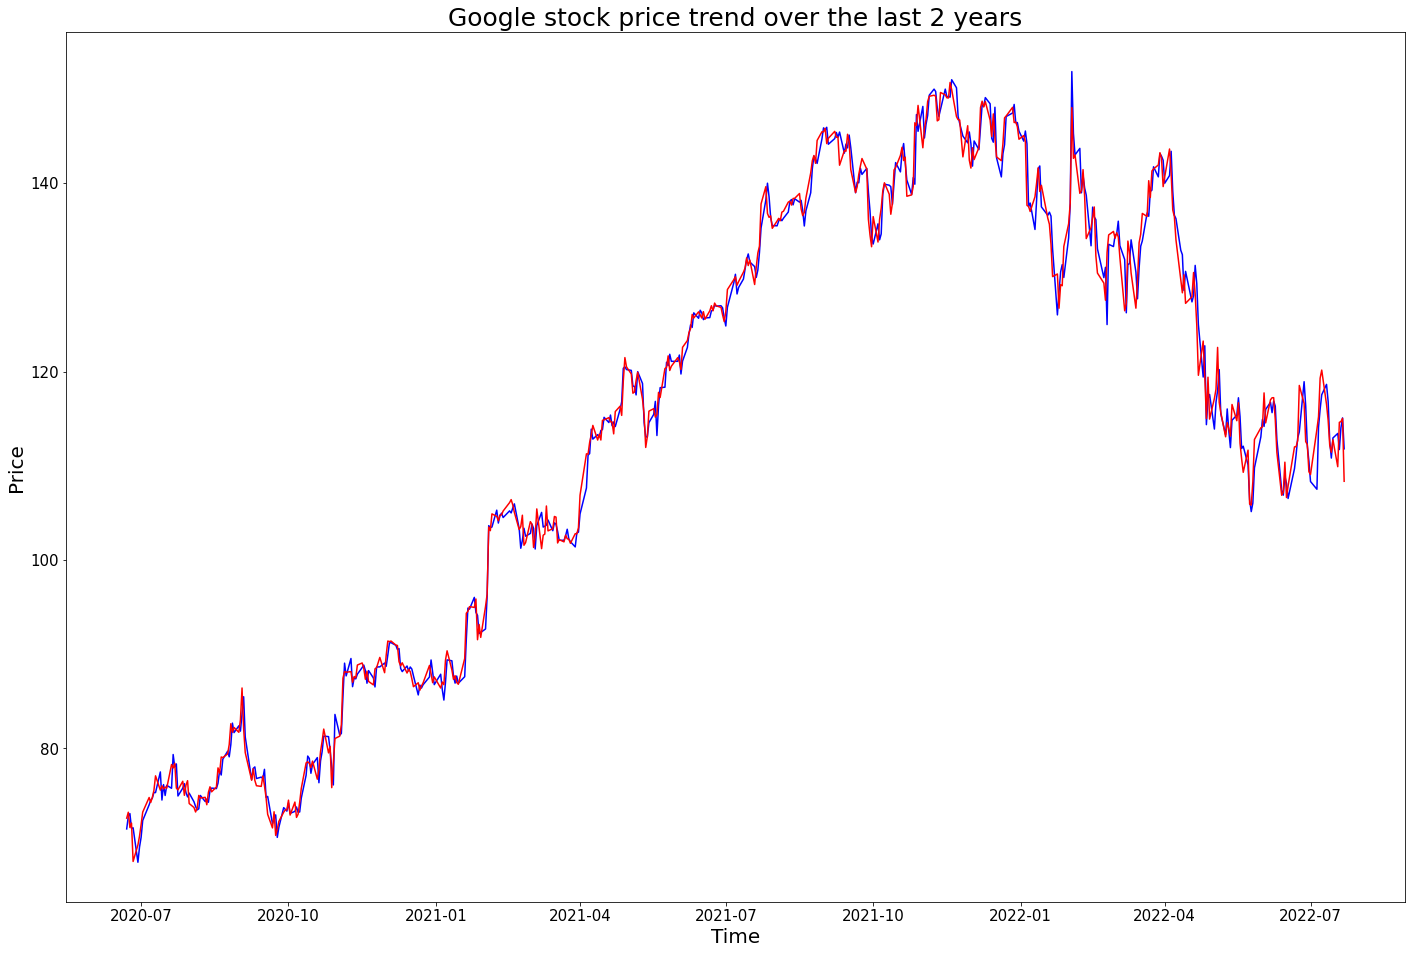

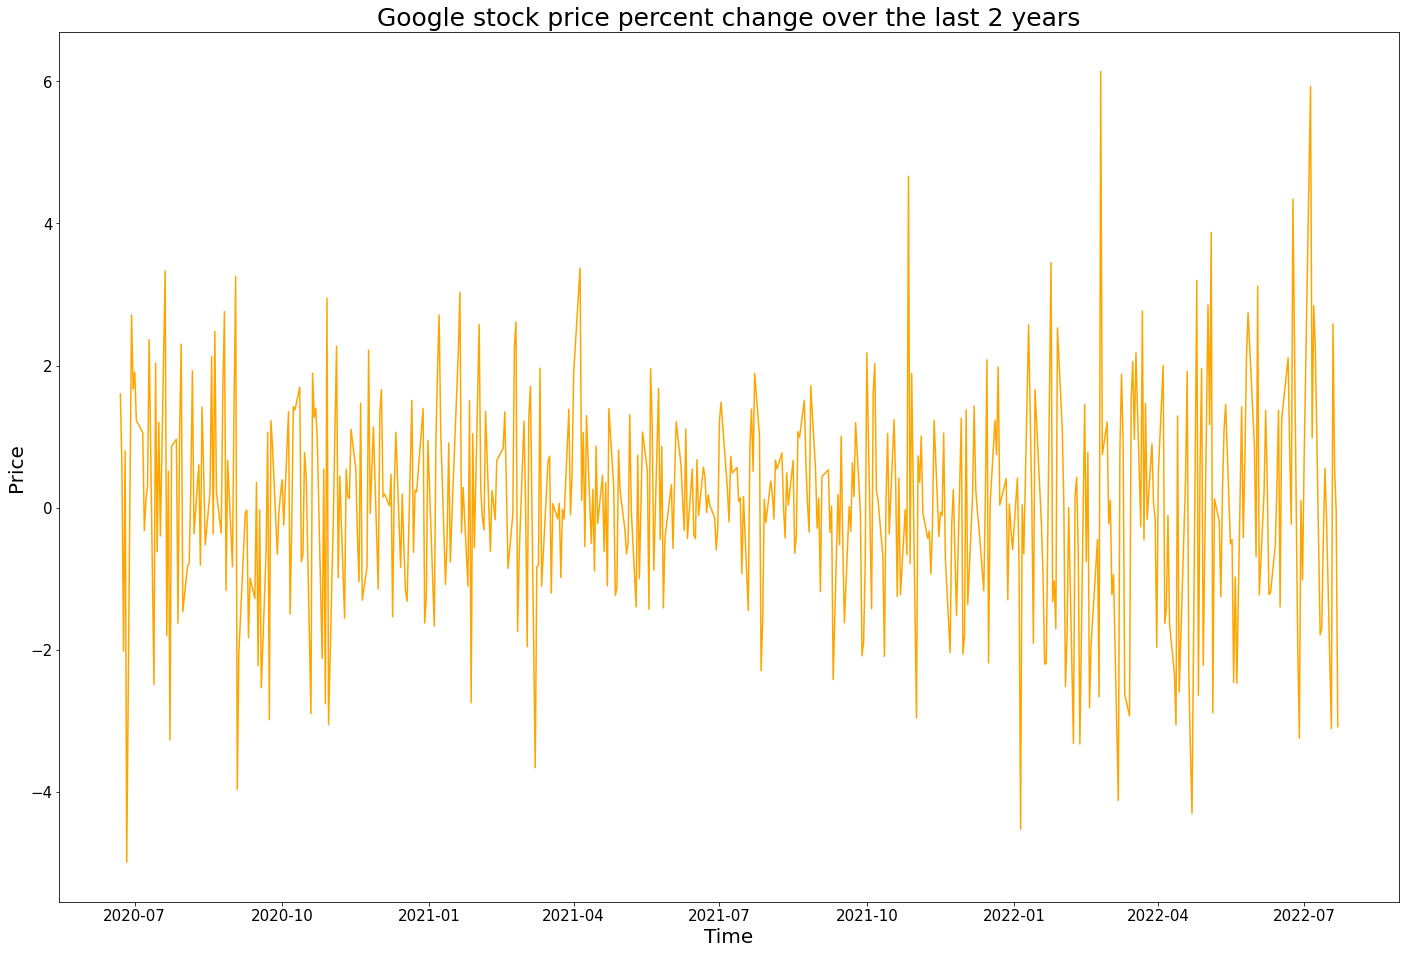

In [8]:
df_stocks = pd.DataFrame()
price_close = []
price_open = []
price_date = []

for result in data['results']: 
    price_close.append(result['close'])
    price_open.append(result['open'])
    price_date.append(result['date'])

df_stocks['date'] = price_date
df_stocks['date'] = list(map(pd.to_datetime,df_stocks['date']))
df_stocks['open_price'] = price_open
df_stocks['close_price'] = price_close
df_stocks['percent_change'] = ((df_stocks['close_price'] - df_stocks['open_price'])/df_stocks['open_price'])*100
df_stocks.index = df_stocks['date']
df_stocks = df_stocks.drop('date',axis=1)

print (df_stocks.head())
print ()
plt.figure(figsize=(24,16))
plt.plot(df_stocks['open_price'],color='blue')
plt.plot(df_stocks['close_price'],color='red')
plt.title('Google stock price trend over the last 2 years',size=25)
plt.xlabel('Time',size=20)
plt.ylabel('Price',size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(24,16))
plt.plot(df_stocks['percent_change'],color='orange')
plt.title('Google stock price percent change over the last 2 years',size=25)
plt.xlabel('Time',size=20)
plt.ylabel('Price',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### 1.2 Price today

In [9]:
date_today = date.today()

url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-prices"

querystring = {"EndDateInclusive":date_today,"StartDateInclusive":date_today,"Symbol":"GOOG","OrderBy":"Ascending"}

headers = {
	"X-RapidAPI-Key": config.api_key,
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)
print ()

#Current price is extracted by selecting the closing price for the given day
print ("Current price:",data['results'][0]['close'])

Full API response

{'offset': 0,
 'responseStatus': {'errorCode': 'FileNotFoundException',
                    'errors': [],
                    'message': 'Not Found',
                    'meta': None,
                    'stackTrace': None},
 'results': [],
 'total': 0}



IndexError: list index out of range

In [11]:
data

{'total': 0,
 'offset': 0,
 'results': [],
 'responseStatus': {'errorCode': 'FileNotFoundException',
  'message': 'Not Found',
  'stackTrace': None,
  'errors': [],
  'meta': None}}

# 2. Live Stock Metadata

In [30]:
url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-metadata"

querystring = {"Symbol":"GOOG"}

headers = {
	"X-RapidAPI-Key": config.api_key,
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)

print ()

#Current price is extracted by selecting the closing price for the given day
print ("Current price:",data['result']['regularMarketPrice'])

Full API response

{'responseStatus': None,
 'result': {'ask': 2243.15,
            'askSize': 31,
            'averageDailyVolume10Day': 1625320,
            'averageDailyVolume3Month': 1534816,
            'bid': 2242,
            'bidSize': 9,
            'currency': 'USD',
            'esgPopulated': False,
            'exchange': 'NMS',
            'exchangeDataDelayedBy': 0,
            'exchangeTimezoneName': 'America/New_York',
            'exchangeTimezoneShortName': 'EDT',
            'fiftyDayAverage': 2302.0942,
            'fiftyDayAverageChange': -64.0293,
            'fiftyDayAverageChangePercent': -0.0278135,
            'fiftyTwoWeekHigh': 3042,
            'fiftyTwoWeekHighChange': -803.93506,
            'fiftyTwoWeekHighChangePercent': -0.26427844,
            'fiftyTwoWeekLow': 2044.16,
            'fiftyTwoWeekLowChange': 193.9049,
            'fiftyTwoWeekLowChangePercent': 0.09485799,
            'fiftyTwoWeekRange': '2044.16 - 3042.0',
            'fullExchange

# 3. Live Stock Statistics

In [57]:
import requests

url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-statistics"

querystring = {"Symbol":"GOOG"}

headers = {
	"X-RapidAPI-Key": config.api_key,
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)
'''
print ()

#Current price is extracted by selecting the closing price for the given day
print ("Current price:",data['results'][0]['close'])
print(response.text)
'''

Full API response

{'responseStatus': None,
 'result': {'currency': 'USD',
            'quarterlyValuationMeasures': [{'label': 'Market Cap (intraday)',
                                            'period': 'Current',
                                            'value': '1530000000000.00'},
                                           {'label': 'Enterprise Value',
                                            'period': 'Current',
                                            'value': '1420000000000.00'},
                                           {'label': 'Trailing P/E',
                                            'period': 'Current',
                                            'value': '21.10'},
                                           {'label': 'Forward P/E',
                                            'period': 'Current',
                                            'value': '20.53'},
                                           {'label': 'PEG Ratio (5 yr '
                               

'\nprint ()\n\n#Current price is extracted by selecting the closing price for the given day\nprint ("Current price:",data[\'results\'][0][\'close\'])\nprint(response.text)\n'